








     
     
     
     
     
     I compared the ICRF3 S/X catalog with the Gaia DR2 catalog (iers_auxilary).

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Load the positional information from these two catalogs.

In [2]:
# Read ICRF3 S/X catalog
from my_progs.catalog.read_icrf import read_icrf3
icrf3 = read_icrf3(wv="sx")

In [3]:
# Read Gaia DR2 IERS quasar data
from my_progs.catalog.read_gaia import read_dr2_iers

gaiadr2 = read_dr2_iers()

A crossmatch is performed to obtain a sample of common sources.

In [4]:
com_sou = join(icrf3, gaiadr2, keys="iers_name", table_names=["icrf3sx", "gaiadr2"])
com_sou

icrf_name,iers_name,type,ra_icrf3sx,dec_icrf3sx,ra_err_icrf3sx,dec_err_icrf3sx,ra_dec_corr_icrf3sx,mean_obs,pos_err_icrf3sx,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gaiadr2,ra_err_gaiadr2,dec_gaiadr2,dec_err_gaiadr2,pos_err_gaiadr2,parallax,parallax_err,pmra,pmra_err,pmdec,pmdec_err,ra_dec_corr_gaiadr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,,,deg,deg,mas,mas,,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
J000318.6-192722,0000-197,--,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,-0.043,55829.0,0.4266174244028753,50632.3,58137.6,5,296,2365855384650325376,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,-0.45544305828221626,0.3185109654739551,0.6116734571782345,0.5735415853774198,0.37085954108422414,0.39878223344506625,0.13461179,0.052950118,0.35212186,-0.022328816,-0.097155325,-0.019389542,0.2804625,-0.1926077,-0.35069835,0.24758662,19.193932,19.635006,18.525171
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251,2365814049884978048,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,-0.24976210176238237,0.36241695927078477,0.6167410883691041,0.5467370543754372,-0.20622857222487195,0.4638258235243829,0.01857697,0.46789265,0.3675997,-0.17307134,-0.20771366,0.066310346,0.5528602,-0.10075016,-0.40074503,0.2787808,19.058247,19.314455,18.64363
J000416.1+461517,0001+459,--,1.0671985290416666,46.254991851444444,0.11585246722802882,0.14079999999999998,0.0152,55487.8,0.1408340404339771,50306.3,57836.8,3,273,387054966590038656,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,-0.029368229696100832,1.0984495193905532,0.9944652987116404,1.2381622163997819,0.4579145221304079,0.9951609005577559,-0.06277916,0.42371804,-0.60506684,0.19084497,0.07386451,0.025139727,-0.6068582,-0.4637956,0.30770168,-0.2570573,20.491125,20.788141,19.799097
J000404.9-114858,0001-120,--,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,-0.0974,55476.6,0.14862223343295053,50576.2,58144.4,5,307,2421598528234887680,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,0.06584825341243254,0.3640494710474267,0.049237658462576495,0.7606129274645607,0.44519648557145636,0.7265389349874076,0.26688337,0.16208343,0.33467895,0.089694664,-0.13309994,0.2532729,0.7076963,-0.11914465,-0.22260411,0.5138607,19.32226,19.66084,18.616665
J000520.2+052410,0002+051,--,1.3342312922499997,5.403000997444445,0.16441624418151832,0.31449999999999995,-0.059,56409.9,0.3147054323091073,49914.7,57951.4,3,187,2742071537411222144,1.3342312881365477,0.055566707261366505,5.403000767650242,0.043549317950419074,0.06716510720786427,-0.18174652464981178,0.07102249423130252,0.01592005248997215,0.1305336978096423,0.013523528754770654,0.08135638551501498,0.7972324,0.32458007,-0.3473576,-0.37228525,0.4254666,-0.28356376,-0.44606686,-0.053894896,-0.3103772,0.33574304,16.121809,16.325563,15.677205
J000504.3+542824,0002+541,--,1.2681806087916665,54.47359013780556,0.09605221846642922,0.10749999999999998,-0.0918,55527.4,0.1090556354174522,49577.0,57840.3,4,269,420305499589122944,1.2681808047501304,0.13120835916273907,54.47359019646749,0.13042564468464754,0.14545837311323823,-0.14358682773108555,0.19574910597769088,-0.03226026529765841,0.2462715837614524,-0.06292777713183365,0.2343089893

Next step is to calculate the positional offset (ICRF3SX - GaiaDR2).

In [5]:
from my_progs.catalog.pos_diff import pos_diff_calc


[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d,
 X] = pos_diff_calc(com_sou["ra_icrf3sx"], com_sou["ra_err_icrf3sx"],
                    com_sou["dec_icrf3sx"], com_sou["dec_err_icrf3sx"],
                    com_sou["ra_dec_corr_icrf3sx"], com_sou["ra_gaiadr2"],
                    com_sou["ra_err_gaiadr2"], com_sou["dec_gaiadr2"],
                    com_sou["dec_err_gaiadr2"], com_sou["ra_dec_corr_gaiadr2"])

com_sou.add_columns(
    [dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X],
    names=[
        "dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov", "ang_sep",
        "nor_dra", "nor_ddec", "nor_sep"
    ])

com_sou["dra"].unit = u.mas
com_sou["ddec"].unit = u.mas
com_sou["dra_err"].unit = u.mas

# Rename the "iers_name" colomu
com_sou.rename_column("iers_name", "source_name")

com_sou

icrf_name,source_name,type,ra_icrf3sx,dec_icrf3sx,ra_err_icrf3sx,dec_err_icrf3sx,ra_dec_corr_icrf3sx,mean_obs,pos_err_icrf3sx,beg_obs,end_obs,nb_sess,nb_del,source_id,ra_gaiadr2,ra_err_gaiadr2,dec_gaiadr2,dec_err_gaiadr2,pos_err_gaiadr2,parallax,parallax_err,pmra,pmra_err,pmdec,pmdec_err,ra_dec_corr_gaiadr2,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,mag,mag,mag,mas,mas,mas,mas,,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000318.6-192722,0000-197,--,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,-0.043,55829.0,0.4266174244028753,50632.3,58137.6,5,296,2365855384650325376,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,-0.45544305828221626,0.3185109654739551,0.6116734571782345,0.5735415853774198,0.37085954108422414,0.39878223344506625,0.13461179,0.052950118,0.35212186,-0.022328816,-0.097155325,-0.019389542,0.2804625,-0.1926077,-0.35069835,0.24758662,19.193932,19.635006,18.525171,0.8485176820000301,0.08492789191905104,0.31429619432739525,0.4678149240845774,0.0024302487468421136,0.8527572945994177,2.6997389638009692,0.1815416472341885,2.7032096286225085
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251,2365814049884978048,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,-0.24976210176238237,0.36241695927078477,0.6167410883691041,0.5467370543754372,-0.20622857222487195,0.4638258235243829,0.01857697,0.46789265,0.3675997,-0.17307134,-0.20771366,0.066310346,0.5528602,-0.10075016,-0.40074503,0.2787808,19.058247,19.314455,18.64363,1.0563603858746113,-1.5887158596683548,0.33897963351943905,0.3589677487717799,-0.006536444802302853,1.9078562177498903,3.11629455406215,-4.4257899633162,5.281824355698598
J000416.1+461517,0001+459,--,1.0671985290416666,46.254991851444444,0.11585246722802882,0.14079999999999998,0.0152,55487.8,0.1408340404339771,50306.3,57836.8,3,273,387054966590038656,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,-0.029368229696100832,1.0984495193905532,0.9944652987116404,1.2381622163997819,0.4579145221304079,0.9951609005577559,-0.06277916,0.42371804,-0.60506684,0.19084497,0.07386451,0.025139727,-0.6068582,-0.4637956,0.30770168,-0.2570573,20.491125,20.788141,19.799097,0.7593523580183696,0.6420915639182567,0.7804748005701125,0.7110377286150351,-0.03352295980671786,0.9944332959445047,0.972936419553439,0.9030344496190487,1.3693305632015087
J000404.9-114858,0001-120,--,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,-0.0974,55476.6,0.14862223343295053,50576.2,58144.4,5,307,2421598528234887680,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,0.06584825341243254,0.3640494710474267,0.049237658462576495,0.7606129274645607,0.44519648557145636,0.7265389349874076,0.26688337,0.16208343,0.33467895,0.089694664,-0.13309994,0.2532729,0.7076963,-0.11914465,-0.22260411,0.5138607,19.32226,19.66084,18.616665,-1.1055086429767285,-0.04702607583340068,0.3186710988615711,0.3276729824952439,0.023136047198045545,1.1065083874533155,-3.4691211312418235,-0.14351526779930127,3.527855220921364
J000520.2+052410,0002+051,--,1.3342312922499997,5.403000997444

In [28]:
print("The maximum positional difference is {:8.3f} mas.".format(max(com_sou["ang_sep"])))
print("                          in R.A. is {:8.3f} mas.".format(max(com_sou["dra"])))
print("                         in decl. is {:8.3f} mas.".format(max(com_sou["ddec"])))

The maximum positional difference is   87.387 mas.
                          in R.A. is   34.256 mas.
                         in decl. is   82.452 mas.


In [6]:
# Seperate the sources into the "defining sources" and "other sources".
# Defining sources
mask_def = (com_sou["type"] == "D")
com_def = com_sou[mask_def]

# Other sources
mask_oth = (com_sou["type"] != "D")
com_oth = com_sou[mask_oth]

There are 2818 common sources: 250 so-called ICRF3 defining sources and 2570 other sources.

Several plots related to the positional difference.

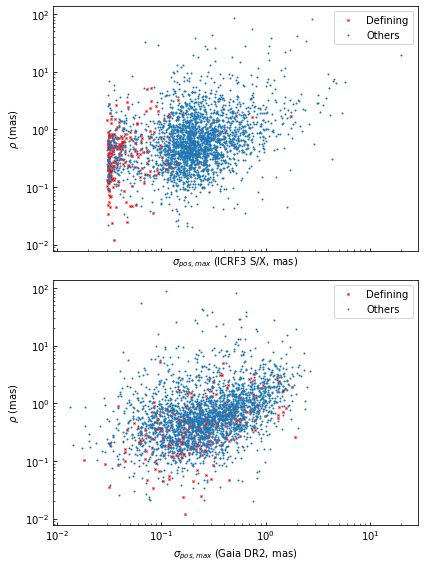

In [7]:
# Angular position difference vs. positional uncertainty
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True)

ax0.plot(com_def["pos_err_icrf3sx"],
         com_def["ang_sep"], "rx", ms=2, label="Defining")
ax1.plot(com_def["pos_err_gaiadr2"],
         com_def["ang_sep"], "rx", ms=2, label="Defining")

ax0.plot(com_oth["pos_err_icrf3sx"],
         com_oth["ang_sep"], ".", ms=2, label="Others")
ax1.plot(com_oth["pos_err_gaiadr2"],
         com_oth["ang_sep"], ".", ms=2, label="Others")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax0.set_xlabel("$\sigma_{pos,max}$ (ICRF3 S/X, mas)")
ax0.set_ylabel("$\\rho$ (mas)")
ax1.set_xlabel("$\sigma_{pos,max}$ (Gaia DR2, mas)")
ax1.set_ylabel("$\\rho$ (mas)")


ax0.legend()
ax1.legend()

fig.tight_layout()
plt.show()

If we use the 250 sources among the ICRF3 defining sources, the maximum positional difference is 5.131 mas.

This difference could be very large for maintaining the CRF.

Anyway, let us just make a try.

In [11]:
print("The maximum positional difference is {:.3f} mas.".format(max(com_def["ang_sep"])))
print("                          in R.A. is {:.3f} mas.".format(max(com_def["dra"])))
print("                         in decl. is {:.3f} mas.".format(max(com_def["ddec"])))

The maximum positional difference is 5.131 mas.
                          in R.A. is 2.695 mas.
                         in decl. is 5.030 mas.


In [ ]:
from write_sou_src import write_sou_src, write_nnr_list

Then I investigate the systematics through the 16-parameters transformation.

In [9]:
# Remove the outlier (consider the normalized separation)
N = len(com_sou)
X0 = np.sqrt(np.log(N) * 2)

print("There are %d sources.\n"
      "When X >= %.2f, the number of the outlier is smaller than 1." % (N, X0))

mask = ((com_sou["nor_sep"] <= X0)
        & (com_sou["ang_sep"] < 10))

# Table of a clean sample
com_clean = com_sou[mask]

print("After elimination, there are %d sources in the clean sample." % len(com_clean))

There are 2820 sources.
When X >= 3.99, the number of the outlier is smaller than 1.
After elimination, there are 2367 sources in the clean sample.
